In [1]:
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt

# we will use astropy for some useful constants and units 
from astropy import units as u
from astropy import constants as const
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)
from IPython.display import Image # to open images in Ipython 


In [2]:
path = '../COMPAS_runs/bh_200_ns_400_combined.h5'

In [3]:
fdata = h5.File(path, 'r')
list(fdata.keys())

['Run_Details', 'SSE_Supernovae', 'SSE_System_Parameters']

In [4]:
# print(list(fdata['Run_Details'].keys()))

# print()

print(list(fdata['SSE_Supernovae'].keys()))

print()

print(list(fdata['SSE_System_Parameters'].keys()))

['Applied_Kick_Magnitude', 'Drawn_Kick_Magnitude', 'Fallback_Fraction', 'Is_Hydrogen_Poor', 'Mass', 'Mass_CO_Core@CO', 'Mass_Core@CO', 'Mass_He_Core@CO', 'Mass_Total@CO', 'SEED', 'SN_Kick_Mean_Anomaly', 'SN_Type', 'Stellar_Type', 'Stellar_Type_Prev', 'Time']

['CH_on_MS', 'LBV_Factor', 'Mass', 'Mass@ZAMS', 'Metallicity@ZAMS', 'Omega@ZAMS', 'Radius@ZAMS', 'SEED', 'SN_Kick_Magnitude_Random_Number', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type', 'Stellar_Type@ZAMS', 'WR_Factor']


In [5]:
# all three groups contain the parameter "SEED", so we can use this to print the lengths
for group in ['SSE_Supernovae', 'SSE_System_Parameters']:
    print('Group %s has %s number of rows'%(group, fdata[group]["SEED"].len()))

Group SSE_Supernovae has 59610 number of rows
Group SSE_System_Parameters has 100000 number of rows


In [6]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


# Plot ZAMS mass vs Remant Mass

In [7]:
MASS_ZAMS = fdata['SSE_System_Parameters']["Mass@ZAMS"][...].squeeze()
MASS_REM = fdata['SSE_System_Parameters']["Mass"][...].squeeze()
STELLAR_TYPE = fdata['SSE_System_Parameters']["Stellar_Type"][...].squeeze()

In [8]:
maskNS = (STELLAR_TYPE ==13)
maskBH = (STELLAR_TYPE ==14)

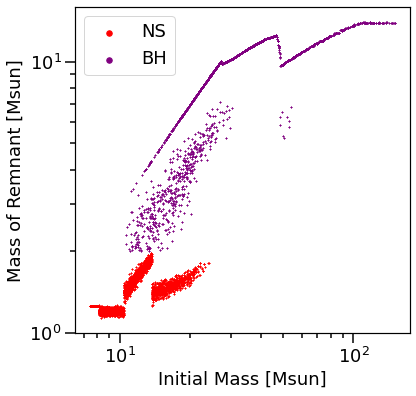

In [9]:
f, ax= plt.subplots(1, 1,  figsize=(6,6)) 
plt.scatter(MASS_ZAMS[maskNS], MASS_REM[maskNS], s=0.1, color='r', label='NS')
plt.scatter(MASS_ZAMS[maskBH], MASS_REM[maskBH], s=0.1, color='purple', label='BH')

layoutAxes(ax=ax, nameX='Initial Mass [Msun]',\
           nameY='Mass of Remnant [Msun]')

plt.loglog()

lgnd = plt.legend(scatterpoints=1, fontsize=18)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.show()

Matches https://arxiv.org/pdf/2109.10352.pdf Fig 8 very well.

## Supernovae

In [10]:
SN_MASS_CORE = fdata['SSE_Supernovae']["Mass_Core@CO"][...].squeeze()
SN_MASS_REM = fdata['SSE_Supernovae']["Mass"][...].squeeze()
SN_STELLAR_TYPE = fdata['SSE_Supernovae']["Stellar_Type"][...].squeeze()
SN_TYPE = fdata['SSE_Supernovae']["SN_Type"][...].squeeze() 

In [11]:
maskSN_NS = ((SN_STELLAR_TYPE ==13) * (SN_TYPE == 1)) # select NSs, ignore electron capture SN
maskSN_BH = ((SN_STELLAR_TYPE ==14) * (SN_TYPE == 1)) # select BHs, ignore electron capture SN

# mass_cut = 2.5 # from Section 3.7.2 in COMPAS doc paper (https://arxiv.org/pdf/2109.10352.pdf)
# maskSN_NS = (SN_MASS_REM < mass_cut)
# maskSN_BH = (SN_MASS_REM >= mass_cut)

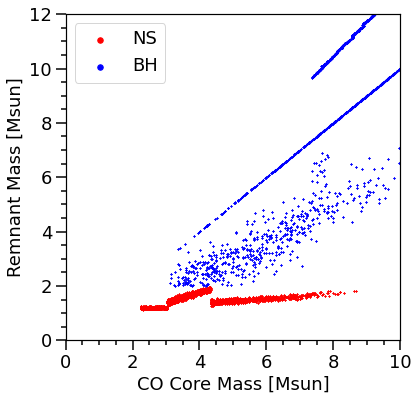

In [12]:
f, ax= plt.subplots(1, 1,  figsize=(6,6)) 

s=0.2
plt.scatter(SN_MASS_CORE[maskSN_NS], SN_MASS_REM[maskSN_NS], s=s, color='r', label='NS')
plt.scatter(SN_MASS_CORE[maskSN_BH], SN_MASS_REM[maskSN_BH], s=s, color='b', label='BH')

layoutAxes(ax=ax, nameX='CO Core Mass [Msun]',\
           nameY='Remnant Mass [Msun]')

plt.xlim(0, 10)
plt.ylim(0, 12)
# plt.loglog()

lgnd = plt.legend(scatterpoints=1, fontsize=18)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.show()


# Plot NS Kick Dist

In [13]:
SN_KICK = fdata['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze()
# SN_KICK = fdata['SSE_Supernovae']["Drawn_Kick_Magnitude"][...].squeeze()

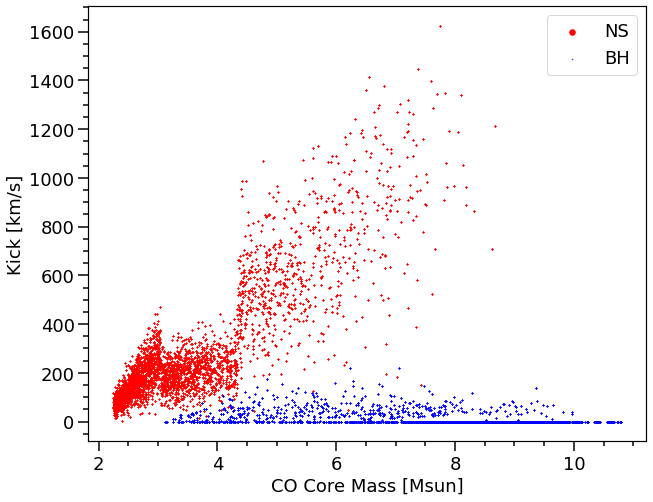

In [15]:
f, ax= plt.subplots(1, 1,  figsize=(10,8)) 

s=0.2
plt.scatter(SN_MASS_CORE[maskSN_NS], SN_KICK[maskSN_NS], s=s, color='r', label='NS')
plt.scatter(SN_MASS_CORE[maskSN_BH], SN_KICK[maskSN_BH], s=s, color='b', label='BH')

layoutAxes(ax=ax, nameX='CO Core Mass [Msun]',\
           nameY='Kick [km/s]')

lgnd = plt.legend(scatterpoints=1, fontsize=18)
lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]

plt.show()

# Plots from Mandel Muller 2020

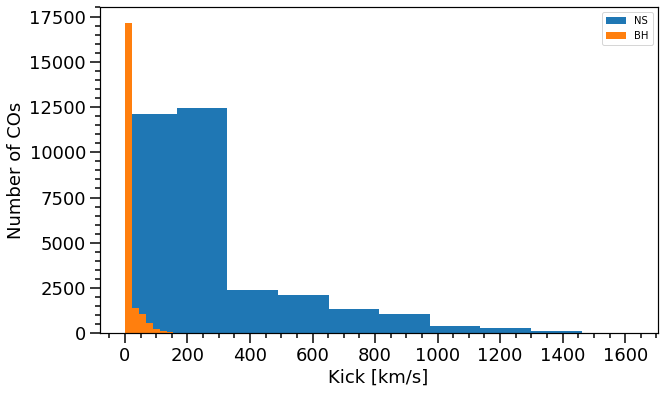

In [17]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 
plt.hist(SN_KICK[maskSN_NS], label='NS')
plt.hist(SN_KICK[maskSN_BH], label='BH')

layoutAxes(ax=ax, nameX='Kick [km/s]',\
           nameY='Number of COs')
plt.legend()
plt.show()

In [18]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

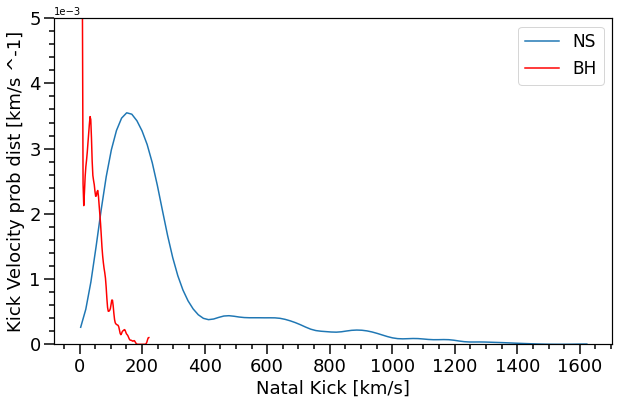

In [20]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

NS_data = SN_KICK[maskSN_NS] 
BH_data = SN_KICK[maskSN_BH] 

# this create the kernel, given an array it will estimate the probability over that values
kde_NS = gaussian_kde( NS_data )
kde_BH = gaussian_kde( BH_data )

# these are the values over wich your kernel will be evaluated
NS_dist_space = linspace( min(NS_data), max(NS_data), 100 )
BH_dist_space = linspace( min(BH_data), max(BH_data), 100 )

# plot the results
plt.plot( NS_dist_space, kde_NS(NS_dist_space), c='C0', label='NS')
plt.plot( BH_dist_space, kde_BH(BH_dist_space), c='r' , label='BH')

layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
           nameY='Kick Velocity prob dist [km/s ^-1]')


plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))

plt.ylim(0, 5e-3)

plt.legend(fontsize=17)

plt.show()

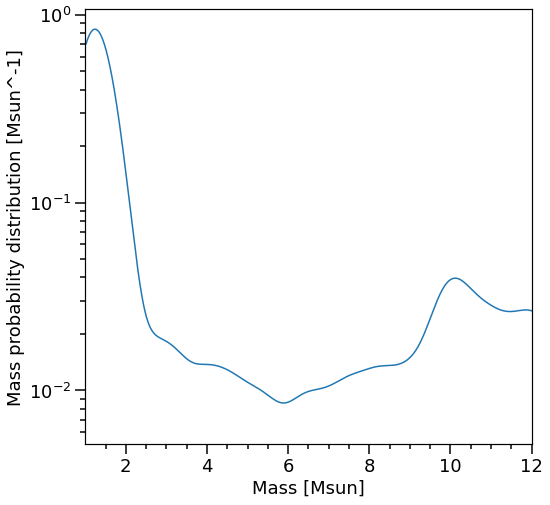

In [21]:
f, ax= plt.subplots(1, 1,  figsize=(8,8)) 

data = MASS_REM 
# this create the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde( data )
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(data), max(data), 1000 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

layoutAxes(ax=ax, nameX='Mass [Msun]',\
           nameY='Mass probability distribution [Msun^-1]')

plt.semilogy()
plt.xlim(1,12)
plt.show()